<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week5_Klasterisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JS05 - Klasterisasi


##Praktikum 1


### Langkah 0 - Download Dataset

### Langkah 1 - Import Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Langkah 2- Load dan Inspeksi Data

In [2]:
df = pd.read_csv('Iris.csv') # membaca data dari file csv Iris lalu dimuat pada pandas dataframe
df.head() # menampilkan 5 baris pertama dari dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Setelah memuat dan menginspeksi 5 baris pertama dataset Iris, saya melihat struktur data yang jelas. Terdapat kolom 'Id', empat kolom yang berisi pengukuran bunga ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' dalam sentimeter), dan kolom 'Species' yang menunjukkan jenis iris. Dari tampilan awal ini, data terlihat bersih dan siap untuk diproses lebih lanjut dalam analisis klasterisasi.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Analisis Output `df.info()`**

Dari output `df.info()`, saya dapat melihat bahwa dataset Iris terdiri dari 150 entri dengan 6 kolom. Penting untuk dicatat bahwa semua kolom memiliki 150 nilai non-null, menandakan tidak adanya nilai yang hilang dalam data, yang merupakan kondisi ideal untuk analisis klasterisasi. Tipe data untuk kolom pengukuran adalah float (seperti SepalLengthCm), sementara kolom 'Species' bertipe object, yang sesuai dengan karakteristik data. Informasi ini meyakinkan saya bahwa data bersih dan siap untuk diproses lebih lanjut.

### Langkah 3 - Seleksi Fitur

In [6]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

X = df.iloc[:, 1:-1]: Baris ini memilih kolom fitur (pengukuran bunga) dari DataFrame df dan menyimpannya di X.

Y = df.iloc[:, -1]: Baris ini memilih kolom label spesies dari DataFrame df dan menyimpannya di Y.

In [7]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


Kode ini menampilkan 5 baris pertama dari variabel `X`, yang berisi fitur-fitur (pengukuran bunga) yang telah dipilih dari dataset Iris. Output menunjukkan bahwa `X` sekarang hanya berisi kolom 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', dan 'PetalWidthCm', siap digunakan untuk klasterisasi.

### Langkah 4 - Plotting

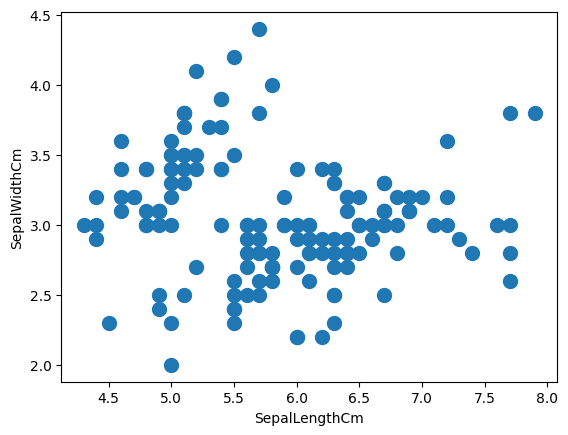

In [8]:
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

**Kegunaan Kode:**

*   `plt.xlabel('SepalLengthCm')`: Memberi label sumbu x pada plot dengan 'SepalLengthCm'.
*   `plt.ylabel('SepalWidthCm')`: Memberi label sumbu y pada plot dengan 'SepalWidthCm'.
*   `plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)`: Membuat scatter plot menggunakan kolom pertama (SepalLengthCm) sebagai nilai x dan kolom kedua (SepalWidthCm) sebagai nilai y dari DataFrame `X`. Parameter `s=100` mengatur ukuran titik-titik pada plot.

**Analisis Output:**

Output dari kode ini adalah sebuah scatter plot. Plot ini memvisualisasikan hubungan antara panjang kelopak (SepalLengthCm) dan lebar kelopak (SepalWidthCm) untuk setiap bunga iris dalam dataset. Dari plot ini, kita bisa mulai melihat kemungkinan adanya pengelompokan (cluster) data berdasarkan dua fitur ini. Titik-titik yang berdekatan menunjukkan bahwa bunga-bunga tersebut memiliki kombinasi panjang dan lebar kelopak yang serupa.

### Langkah 5 - Membuat Model K-Mens

In [9]:
# Membuat Model K-Means
# Berdasarkan inspeksi visual menggunakan scatterplot,
# kita dapat berasumsi bahwa data memiliki 2 cluster
# (meskipun, dari labelnya, terdapat 3 label dalam data ini)

from sklearn.cluster import KMeans

# Inisiasi objek K-Means dengan jumlah cluster 2
cl_kmeans = KMeans(n_clusters=2)

# Latih dan prediksi
y_kmeans = cl_kmeans.fit_predict(X)

Kode ini menggunakan algoritma K-Means untuk melakukan klasterisasi pada data fitur (X). Objek `KMeans` diinisialisasi dengan jumlah klaster 2, kemudian model dilatih (`fit`) menggunakan data `X` dan memprediksi klaster untuk setiap titik data (`predict`). Hasil prediksi klaster disimpan dalam variabel `y_kmeans`.

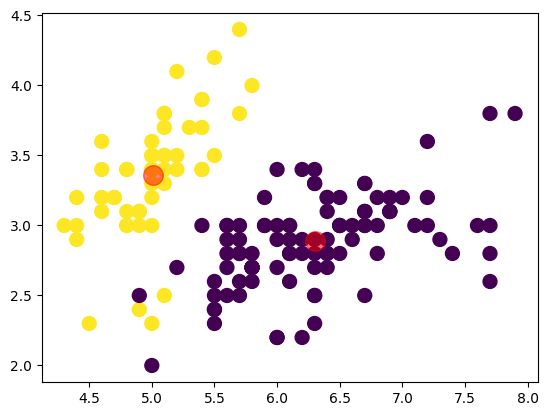

In [10]:
# Plot hasil klasterisasi
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Kegunaan Kode:**

Kode ini membuat visualisasi hasil klasterisasi K-Means.

*   `plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)`: Membuat scatter plot dari data `X` menggunakan dua fitur pertama (SepalLengthCm dan SepalWidthCm). Warna titik-titik ditentukan oleh hasil klasterisasi (`y_kmeans`), sehingga setiap klaster memiliki warna berbeda.
*   `centers = cl_kmeans.cluster_centers_`: Mengambil koordinat pusat (centroid) dari setiap klaster yang ditemukan oleh model K-Means.
*   `plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)`: Menambahkan titik-titik merah besar pada plot untuk menandai lokasi centroid klaster.

**Analisis Output:**

Output dari kode ini adalah sebuah scatter plot yang menampilkan data poin yang diwarnai berdasarkan klaster yang ditetapkan oleh algoritma K-Means. Titik-titik merah menunjukkan pusat dari setiap klaster. Dari plot ini, kita dapat melihat bagaimana data terbagi menjadi klaster-klaster berdasarkan fitur SepalLengthCm dan SepalWidthCm, serta lokasi pusat klaster yang ditemukan oleh model.

### Langkah 6 - Evaluasi Model
Untuk mengevaluasi performa model klasterisasi K-Means, salah satu metrik yang dapat digunakan adalah Sum of Square Error (SSE). Nilai SSE dapat diakses melalui properti `inertia_` dari objek K-Means yang telah dilatih.

In [11]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


**Kegunaan Kode:**

Kode ini menghitung dan mencetak nilai Sum of Square Error (SSE) dari model K-Means yang telah dilatih. SSE adalah metrik yang mengukur seberapa dekat titik-titik data dalam klaster dengan pusat klaster (centroid) masing-masing.

**Analisis Output:**

Output menunjukkan nilai SSE dari model K-Means dengan 2 klaster adalah `152.36870647733915`. Nilai SSE yang lebih rendah umumnya menunjukkan klasterisasi yang lebih baik, karena ini berarti titik-titik data lebih dekat ke pusat klaster mereka. Namun, nilai SSE sendiri tidak memberikan gambaran lengkap tentang kualitas klasterisasi tanpa membandingkannya dengan model lain atau nilai SSE untuk jumlah klaster yang berbeda (seperti menggunakan metode elbow).

### Langkah 7 - Menentukan 𝑘 terbaik dengan Elbow Method

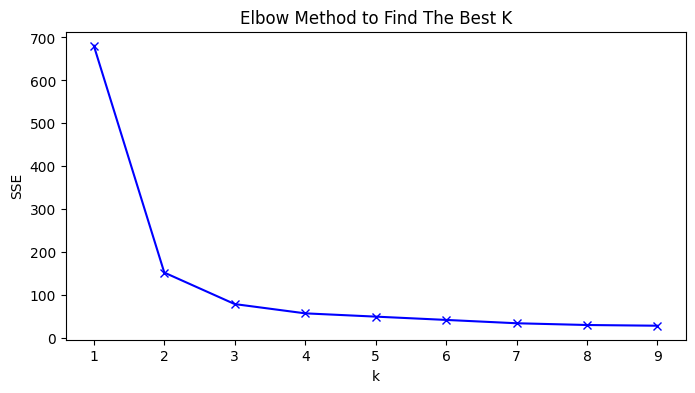

In [12]:
# Menentukan k terbaik
# menggunakan Metode Elbow

# Daftar nilai SSE
sse = []

# Buat rentang k dari 1 hingga 9
K = range(1,10)

# Cari nilai SSE untuk setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting distorsi
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

**Kegunaan Kode:**

Kode ini mengimplementasikan metode Elbow untuk menentukan jumlah klaster (k) terbaik untuk K-Means. Kode menghitung nilai Sum of Square Error (SSE) untuk rentang nilai k (dari 1 hingga 9) dan menyimpannya dalam daftar `sse`.

**Analisis Output:**

Output dari kode ini adalah plot "Elbow Method to Find The Best K". Sumbu x menunjukkan nilai k (jumlah klaster), dan sumbu y menunjukkan nilai SSE yang sesuai. Metode Elbow menyarankan untuk memilih nilai k di mana penurunan SSE mulai melambat secara signifikan, membentuk "siku" pada plot. Dari plot ini, kita dapat mengamati di mana "siku" terbentuk untuk mengidentifikasi k yang optimal. **Berdasarkan plot, "siku" terlihat paling jelas pada k = 3. Ini menunjukkan bahwa 3 adalah jumlah klaster terbaik untuk data ini.**

## Praktikum 2

### Langkah 0 - Import Library

In [13]:
# Mengimpor library yang dibutuhkan untuk visualisasi data dan komputasi numerik

# matplotlib.pyplot untuk membuat plot dan visualisasi data
import matplotlib.pyplot as plt
# seaborn untuk visualisasi statistik yang lebih menarik
import seaborn as sns
# numpy untuk operasi komputasi numerik, terutama pada array
import numpy as np

### Langkah 1 - Membuat Dataset Sintetis

In [14]:
# Membuat dataset sintetis berbentuk bulan sabit (moons)
from sklearn.datasets import make_moons

# Menghasilkan 200 sampel dengan sedikit noise
X, y = make_moons(200, noise=.05, random_state=0)

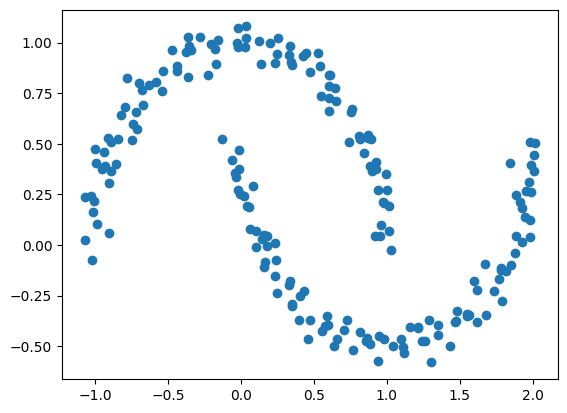

In [15]:
plt.scatter(X[:, 0], X[:, 1])

**Kegunaan Kode:**

Kode ini membuat scatter plot dari dataset sintetis yang baru saja dibuat. `X[:, 0]` digunakan untuk nilai sumbu x (fitur pertama), dan `X[:, 1]` digunakan untuk nilai sumbu y (fitur kedua).

**Analisis Output:**

Output dari kode ini adalah scatter plot yang memvisualisasikan data poin dari dataset "moons". Dari plot ini, terlihat bahwa data membentuk dua bentuk seperti bulan sabit yang saling berdekatan. Visualisasi ini penting untuk memahami struktur data dan mengapa algoritma klasterisasi non-linear mungkin lebih cocok untuk data seperti ini dibandingkan K-Means standar.

### Langkah 2 - Klasterisasi dengan K-Means

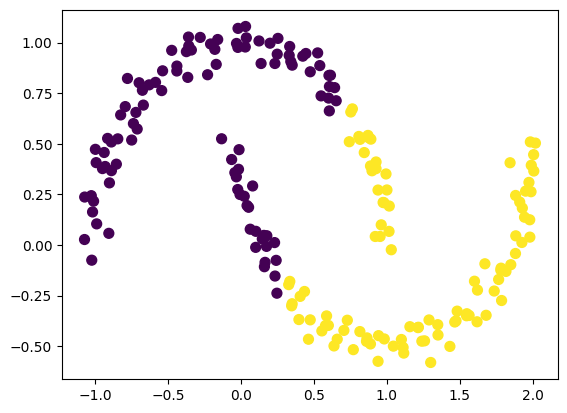

In [16]:
# Klasterisasi dengan K-Means
from sklearn.cluster import KMeans

# Inisiasi objek K-Means dengan 2 klaster dan random_state untuk hasil yang konsisten
kmeans = KMeans(2, random_state=0)
# Latih model dan prediksi klaster
cluster = kmeans.fit_predict(X)

# Plot hasil klasterisasi
# Mewarnai titik data berdasarkan klaster yang diprediksi
plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

**Kegunaan Kode:**

Kode ini melakukan klasterisasi pada dataset "moons" menggunakan algoritma K-Means dengan 2 klaster, lalu memvisualisasikan hasilnya.

**Analisis Output:**

Plot menunjukkan data poin dari dataset "moons" yang diwarnai berdasarkan klaster yang diprediksi oleh K-Means. Terlihat bahwa K-Means kesulitan memisahkan kedua bentuk bulan sabit karena algoritmanya berbasis jarak Euclidean dan mencari klaster berbentuk bulat. Hasilnya, K-Means membagi data secara vertikal, bukan mengikuti bentuk melengkung dari "bulan sabit" tersebut. Ini menunjukkan keterbatasan K-Means pada data dengan bentuk non-linear.

In [17]:
# Menghitung Silhouette Score untuk mengevaluasi kualitas klasterisasi
from sklearn.metrics import silhouette_score

# Mencetak nilai Silhouette Score
print(silhouette_score(X, cluster))

0.49215648268306905


**Kegunaan Kode:**

Kode ini menghitung dan mencetak nilai *Silhouette Score* untuk mengevaluasi kualitas klasterisasi K-Means. *Silhouette Score* mengukur seberapa mirip sebuah objek dengan klaster (dibandingkan dengan klaster lain).

**Analisis Output:**

Output menunjukkan nilai *Silhouette Score* sebesar `0.49215648268306905`. Nilai ini berada di antara -1 dan 1. Nilai yang mendekati 1 menunjukkan klasterisasi yang baik (objek mirip dengan klaster sendiri dan berbeda dengan klaster lain), nilai mendekati 0 menunjukkan tumpang tindih antar klaster, dan nilai negatif menunjukkan objek mungkin salah dikelompokkan. Skor 0.49 ini menunjukkan klasterisasi yang moderat, yang sesuai dengan visualisasi sebelumnya di mana K-Means kesulitan memisahkan bentuk "bulan sabit".

### Langkah 3 - Klasterisasi dengan DBSCAN

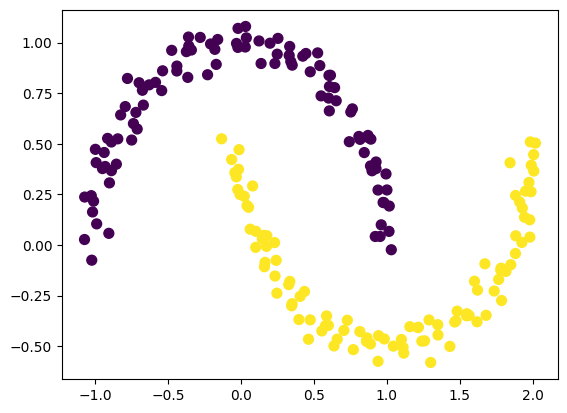

In [18]:
# Klasterisasi dengan DBSCAN
from sklearn.cluster import DBSCAN

# Inisiasi objek DBSCAN dengan parameter eps dan min_samples
dbscan = DBSCAN(eps=0.3, min_samples=2)
# Latih model dan prediksi klaster
cluster_db = dbscan.fit_predict(X)

# Plot hasil klasterisasi
# Mewarnai titik data berdasarkan klaster yang diprediksi oleh DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

**Kegunaan Kode:**

Kode ini melakukan klasterisasi pada dataset "moons" menggunakan algoritma DBSCAN, lalu memvisualisasikan hasilnya.

**Analisis Output:**

Plot menunjukkan data poin dari dataset "moons" yang diwarnai berdasarkan klaster yang diprediksi oleh DBSCAN. Berbeda dengan K-Means, DBSCAN berhasil mengidentifikasi kedua bentuk bulan sabit sebagai klaster terpisah. Titik-titik yang diwarnai menunjukkan anggota dari klaster yang berbeda, dan titik-titik abu-abu (jika ada) menunjukkan noise yang tidak termasuk dalam klaster manapun. Ini menunjukkan bahwa DBSCAN lebih efektif dalam menemukan klaster dengan bentuk non-linear dibandingkan K-Means.

In [19]:
# Menghitung Silhouette Score untuk mengevaluasi kualitas klasterisasi DBSCAN
from sklearn.metrics import silhouette_score

# Mencetak nilai Silhouette Score
print(silhouette_score(X, cluster_db))

0.32585318950197517


**Kegunaan Kode:**

Kode ini menghitung dan mencetak nilai *Silhouette Score* untuk mengevaluasi kualitas klasterisasi DBSCAN.

**Analisis Output:**

Output menunjukkan nilai *Silhouette Score* sebesar `0.32`. Meskipun lebih rendah dari K-Means (0.49), secara visual DBSCAN lebih optimal untuk data ini karena berhasil menemukan bentuk klaster bulan sabit yang sebenarnya. Skor yang lebih rendah ini menunjukkan bahwa *Silhouette Score* mungkin kurang cocok untuk mengevaluasi klaster non-linear.

**Davies-Bouldin Index (DBI) --> fokus pada separasi indeks, semakin kecil semakin baik, rentang 0 hingga tak hingga.**

In [20]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


**Kegunaan Kode:**

Kode ini menghitung dan mencetak nilai *Davies-Bouldin Index* (DBI) untuk mengevaluasi kualitas klasterisasi DBSCAN. DBI adalah metrik yang mengukur seberapa baik pemisahan antar klaster, dengan mempertimbangkan dispersi dalam klaster dan jarak antar centroid klaster.

**Analisis Output:**

Output menunjukkan nilai *Davies-Bouldin Index* sebesar `1.1622685374061352`. Nilai DBI yang lebih rendah menunjukkan klasterisasi yang lebih baik (pemisahan antar klaster lebih baik dan klaster lebih kompak). Tidak ada nilai batas universal yang menunjukkan DBI "baik", tetapi nilai ini dapat dibandingkan dengan hasil dari algoritma klasterisasi lain atau dengan jumlah klaster yang berbeda untuk data yang sama. Dalam konteks dataset "moons" yang non-linear, nilai ini memberikan metrik kuantitatif lain selain *Silhouette Score* untuk membantu mengevaluasi seberapa baik DBSCAN memisahkan klaster.

## Praktikum 3

### Langkah 0 - Import Library

In [21]:
# Mengimpor library yang dibutuhkan:
# matplotlib.pyplot untuk membuat plot dan visualisasi data
import matplotlib.pyplot as plt
# seaborn untuk visualisasi statistik yang lebih menarik
import seaborn as sns
# numpy untuk operasi komputasi numerik, terutama pada array
import numpy as np

### Langkah 1 - Load Data Citra

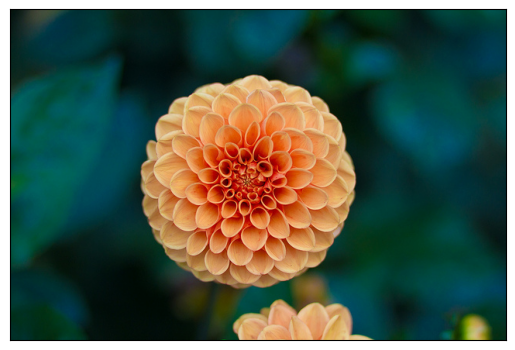

In [22]:
# Memuat data citra sampel
from sklearn.datasets import load_sample_image

# Memuat citra bunga
flower = load_sample_image("flower.jpg")

# Membuat axes untuk plot tanpa ticks
ax = plt.axes(xticks=[], yticks=[])
# Menampilkan citra
ax.imshow(flower)

**Kegunaan Kode:**

Kode ini memuat citra sampel bunga menggunakan fungsi `load_sample_image` dari scikit-learn dan menampilkannya menggunakan matplotlib.

**Analisis Output:**

Output dari kode ini adalah tampilan citra bunga pada plot. Plot ini dibuat tanpa label sumbu x dan y (`xticks=[], yticks=[]`) agar tampilan citra lebih bersih. Visualisasi ini menunjukkan citra yang akan digunakan dalam langkah-langkah selanjutnya, kemungkinan untuk diproses lebih lanjut atau dianalisis.

### Langkah 2 - Preprocessing

In [23]:
# Preprocessing Data Citra
# Melakukan preprocessing pada data citra

# Check shape
# Memeriksa dimensi citra
print(flower.shape)

# Normalize color
# Normalisasi nilai piksel (membagi dengan 255.0) agar berada dalam rentang 0-1
data = flower / 255.0

# Reshape
# Mengubah dimensi citra menjadi array 2D (tinggi * lebar, kanal warna)
data = data.reshape(427 * 640, 3) # mengubah menjadi array 1D (dalam konteks piksel)

# Memeriksa dimensi data setelah reshape
print(data.shape)

(427, 640, 3)
(273280, 3)


**Kegunaan Kode:**

Kode ini melakukan pra-pemrosesan pada data citra bunga. Langkah-langkahnya meliputi:

1.  Mencetak dimensi asli citra (`flower.shape`).
2.  Melakukan normalisasi nilai piksel citra dengan membaginya dengan 255.0 agar nilainya berada dalam rentang 0 hingga 1.
3.  Mengubah bentuk (reshape) data citra dari format 3D (tinggi, lebar, kanal warna) menjadi 2D (jumlah piksel, kanal warna). Ini dilakukan untuk mempersiapkan data agar dapat digunakan oleh algoritma klasterisasi.
4.  Mencetak dimensi data setelah reshape (`data.shape`).

**Analisis Output:**

Output menunjukkan dua baris:

1.  `(427, 640, 3)`: Ini adalah dimensi asli citra, menunjukkan tinggi 427 piksel, lebar 640 piksel, dan 3 kanal warna (merah, hijau, biru).
2.  `(273280, 3)`: Ini adalah dimensi data setelah di-reshape. `273280` adalah hasil dari 427 * 640 (jumlah total piksel), dan `3` adalah jumlah kanal warna. Output ini mengkonfirmasi bahwa citra berhasil diubah menjadi format 2D yang siap untuk analisis klasterisasi.

### Langkah 3 - Cek Sebaran Warna

In [25]:
# Fungsi untuk memplot sebaran piksel berdasarkan warna
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Memilih subset acak dari data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Membuat dua subplot untuk relasi Red-Green dan Red-Blue
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    # Plot Red vs Green
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # Plot Red vs Blue
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # Menambahkan judul utama pada figure
    fig.suptitle(title, size=20);

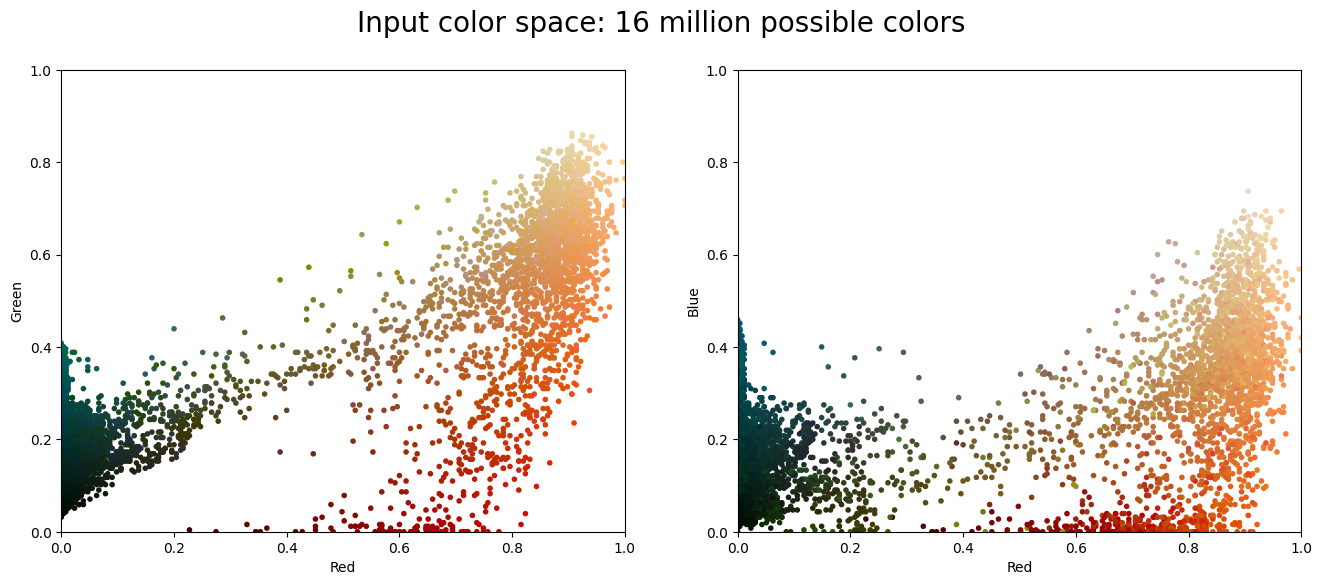

In [26]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Kegunaan Kode:**

Kode ini memanggil fungsi `plot_pixels` yang telah didefinisikan sebelumnya untuk memvisualisasikan sebaran warna pada data citra yang sudah di-preprocess.

**Analisis Output:**

Output dari kode ini adalah plot yang menampilkan sebaran piksel berdasarkan nilai warna Merah (Red), Hijau (Green), dan Biru (Blue). Terdapat dua subplot: satu menunjukkan hubungan Red vs Green, dan satu lagi Red vs Blue. Setiap titik pada plot merepresentasikan satu piksel dari citra, dengan warnanya sesuai dengan warna asli piksel tersebut. Plot ini membantu kita memahami distribusi warna dalam citra dan melihat apakah ada pengelompokan warna yang jelas sebelum melakukan klasterisasi warna. Judul plot "Input color space: 16 million possible colors" menunjukkan bahwa plot ini menampilkan semua kemungkinan kombinasi warna dalam ruang warna RGB.

### Langkah 4 - Klasterisasi Warna

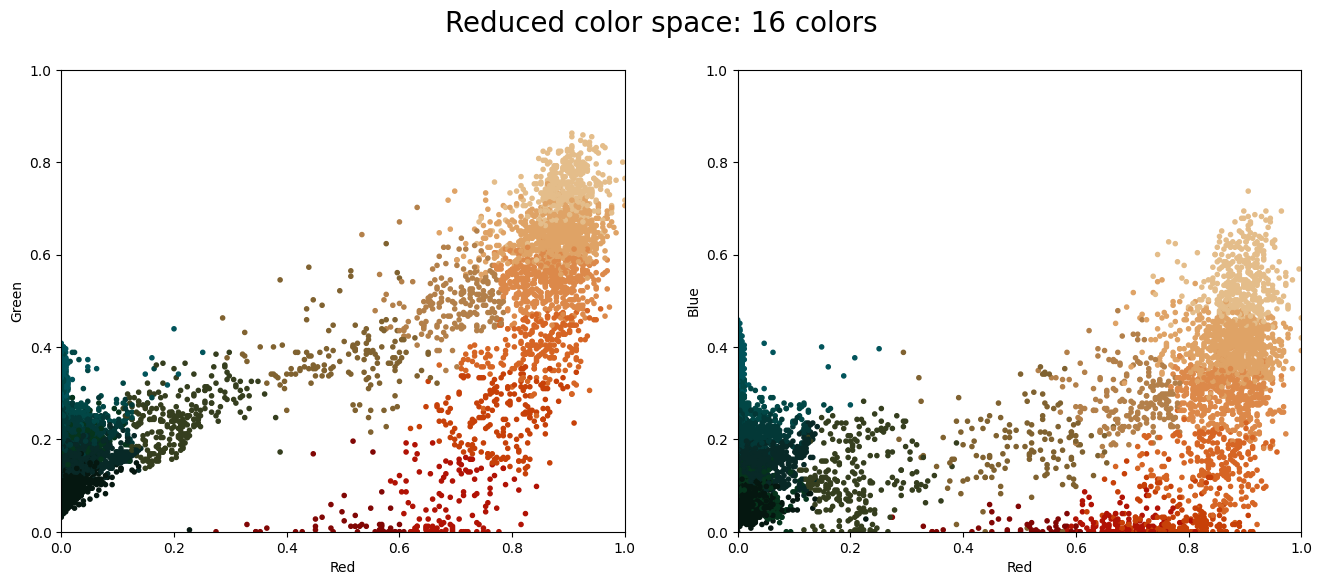

In [27]:
# Klasterisasi Warna
from sklearn.cluster import MiniBatchKMeans

# Inisiasi model MiniBatchKMeans dengan 16 klaster
kmeans = MiniBatchKMeans(16)
# Latih model pada data piksel
kmeans.fit(data)
# Ganti setiap piksel dengan warna pusat klaster terdekatnya
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Plot hasil klasterisasi warna
plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

**Kegunaan Kode:**

Kode ini melakukan klasterisasi warna pada data citra menggunakan algoritma MiniBatchKMeans dengan 16 klaster. Setelah model dilatih, setiap piksel dalam citra diganti dengan warna pusat klaster terdekatnya.

**Analisis Output:**

Output dari kode ini adalah plot yang mirip dengan plot sebelumnya, tetapi kali ini sebaran warna piksel dibatasi hanya pada 16 warna yang merupakan pusat klaster hasil MiniBatchKMeans. Plot ini memvisualisasikan bagaimana klasterisasi warna telah mengurangi jumlah warna dalam citra, menggantikan setiap warna asli dengan salah satu dari 16 warna representatif klaster. Ini menunjukkan hasil dari proses kuantisasi warna menggunakan K-Means.

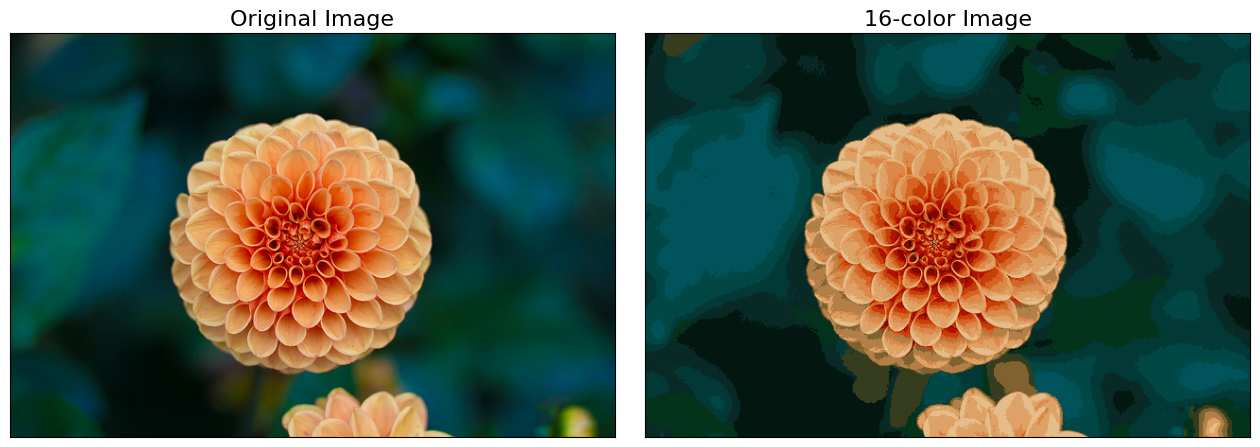

In [28]:
# Mengubah dimensi kembali ke bentuk citra asli
flower_recolored = new_colors.reshape(flower.shape)

# Membuat figure dan axes untuk menampilkan citra asli dan citra hasil klasterisasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# Menyesuaikan jarak antar subplot
fig.subplots_adjust(wspace=0.05)
# Menampilkan citra asli pada subplot pertama
ax[0].imshow(flower)
# Memberi judul pada subplot pertama
ax[0].set_title('Original Image', size=16)
# Menampilkan citra hasil klasterisasi pada subplot kedua
ax[1].imshow(flower_recolored)
# Memberi judul pada subplot kedua
ax[1].set_title('16-color Image', size=16);

**Kegunaan Kode:**

Kode ini memproses hasil klasterisasi warna untuk ditampilkan sebagai citra.
- Baris pertama mengubah bentuk data warna hasil klasterisasi kembali ke dimensi citra asli.
- Baris-baris selanjutnya membuat dua subplot untuk menampilkan citra asli dan citra yang telah dikuantisasi warnanya (menjadi 16 warna) secara berdampingan untuk perbandingan visual.

**Analisis Output:**

Output dari kode ini adalah tampilan berdampingan dari citra bunga asli dan citra bunga yang telah dikuantisasi warnanya menggunakan K-Means. Citra hasil kuantisasi menampilkan palet warna yang jauh lebih sedikit (16 warna) dibandingkan citra asli. Perbandingan visual ini memungkinkan kita melihat efek dari klasterisasi warna dalam mengurangi kompleksitas warna citra sambil tetap mempertahankan fitur-fitur utama.

## Tugas Praktikum

### Soal Nomor 1



**Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?**

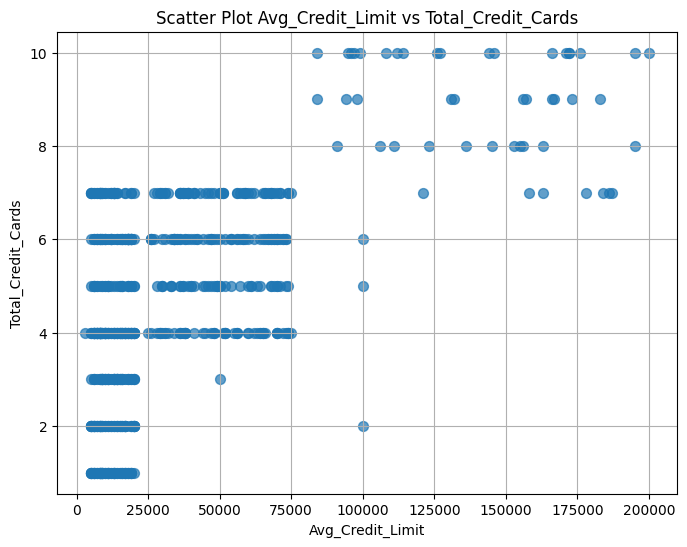

In [30]:
# Muat dataset
df_cc = pd.read_csv('CC_Customer_Dataset.csv')

# Pilih variabel yang akan digunakan
X_cc = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards']]

# Buat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_cc['Avg_Credit_Limit'], X_cc['Total_Credit_Cards'], s=50, alpha=0.7)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Scatter Plot Avg_Credit_Limit vs Total_Credit_Cards')
plt.grid(True)
plt.show()

**Kegunaan Kode:**

Kode ini memuat dataset 'CC_Customer_Dataset.csv', lalu memilih kolom 'Avg_Credit_Limit' dan 'Total_Credit_Cards' untuk membuat scatter plot. Plot ini memvisualisasikan hubungan antara rata-rata batas kredit dan total kartu kredit nasabah.

**Analisis Hasil Output:**

Output dari kode ini adalah scatter plot yang menampilkan sebaran titik-titik data berdasarkan 'Avg\_Credit\_Limit' pada sumbu x dan 'Total\_Credit\_Cards' pada sumbu y. Dari plot ini, terlihat bahwa titik-titik data cenderung mengumpul dalam beberapa area atau kelompok yang berbeda, dan tidak mengikuti pola garis lurus yang jelas.

**Apakah sebaran data dapat dikatakan linier?**

**Tidak**, berdasarkan scatter plot, sebaran data antara 'Avg\_Credit\_Limit' pada sumbu X dan 'Total\_Credit\_Cards' pada sumbu Y **tidak dapat dikatakan linier**. Titik-titik data terlihat lebih mengelompok dalam beberapa area yang terpisah, seperti ada sekelompok nasabah dengan batas kredit rendah dan jumlah kartu sedikit, kelompok lain dengan batas kredit sedang dan jumlah kartu lebih banyak, dan seterusnya. Distribusi ini menunjukkan adanya **pengelompokan (cluster)** yang berbeda dalam data, bukan pola garis lurus yang konsisten di mana peningkatan pada satu sumbu (misalnya, batas kredit) akan selalu diikuti oleh peningkatan proporsional pada sumbu lainnya (jumlah kartu). Sebaran data yang mengumpul dalam kelompok-kelompok menunjukkan struktur non-linier yang kemungkinan besar lebih cocok dianalisis menggunakan teknik klasterisasi.

### Soal Nomor 2

**Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah
k
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.**

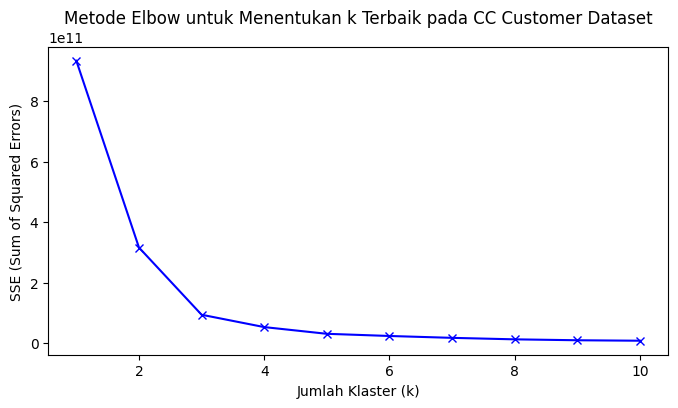

In [31]:
# Menggunakan Elbow Method untuk menentukan jumlah k terbaik
from sklearn.cluster import KMeans

# Daftar nilai SSE
sse_cc = []

# Buat rentang k dari 1 hingga 10 (atau lebih, tergantung data)
K_cc = range(1, 11)

# Cari nilai SSE untuk setiap k
for k in K_cc:
    kmeans_model_cc = KMeans(n_clusters=k, random_state=0, n_init=10) # Tambahkan random_state dan n_init
    kmeans_model_cc.fit(X_cc)
    sse_cc.append(kmeans_model_cc.inertia_)

# Plotting distorsi (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K_cc, sse_cc, "bx-")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Metode Elbow untuk Menentukan k Terbaik pada CC Customer Dataset")
plt.show()

**Kegunaan Kode:**

Kode ini mengimplementasikan metode Elbow untuk menentukan jumlah klaster (k) terbaik untuk K-Means pada dataset pelanggan. Kode menghitung nilai Sum of Square Error (SSE) untuk rentang nilai k dari 1 hingga 10.

**Analisis Hasil Output:**

Output dari kode ini adalah plot "Metode Elbow untuk Menentukan k Terbaik pada CC Customer Dataset". Sumbu horizontal menunjukkan jumlah klaster (k), dan sumbu vertikal menunjukkan nilai SSE. Metode Elbow mencari "siku" pada plot, yaitu titik di mana penurunan SSE mulai melambat secara signifikan.

**Mengapa memilih k tersebut?**

Untuk menentukan nilai k terbaik, kita mencari titik "siku" pada plot. Pada plot ini, terlihat penurunan SSE paling tajam dari k=1 ke k=2, dan kemudian dari k=2 ke k=3. Setelah k=3, penurunan SSE mulai melambat secara signifikan. Ini menunjukkan bahwa menambahkan klaster lebih dari 3 tidak memberikan pengurangan SSE yang substansial. Oleh karena itu, berdasarkan metode Elbow, **nilai k terbaik untuk dataset ini adalah 3**, karena pada titik ini "siku" terbentuk, menandakan bahwa 3 klaster adalah jumlah yang optimal untuk merepresentasikan struktur data.

###  Soal Nomor 3

**Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.**

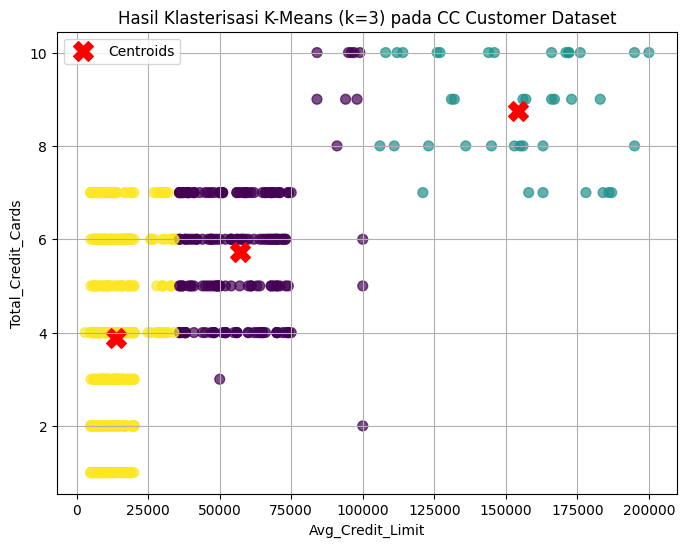

In [32]:
# Klasterisasi dengan K-Means menggunakan k=3 (hasil Elbow Method)
kmeans_final = KMeans(n_clusters=3, random_state=0, n_init=10)
cluster_cc = kmeans_final.fit_predict(X_cc)

# Plot hasil klasterisasi
plt.figure(figsize=(8, 6))
plt.scatter(X_cc['Avg_Credit_Limit'], X_cc['Total_Credit_Cards'], c=cluster_cc, s=50, cmap='viridis', alpha=0.7)

# Plot centroid
centers_cc = kmeans_final.cluster_centers_
plt.scatter(centers_cc[:, 0], centers_cc[:, 1], c='red', s=200, alpha=1.0, marker='X', label='Centroids')

plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Hasil Klasterisasi K-Means (k=3) pada CC Customer Dataset')
plt.grid(True)
plt.legend()
plt.show()

# Analisis visual hasil klasterisasi
# Amati bagaimana data terbagi menjadi 3 klaster
# dan lokasi pusat klaster.

**Kegunaan Kode:**

Kode ini melakukan klasterisasi K-Means pada dataset pelanggan menggunakan 3 klaster (berdasarkan hasil Elbow Method) dan kemudian memvisualisasikan hasilnya.
- Baris pertama menginisiasi model K-Means dengan `n_clusters=3` dan melatihnya pada data fitur `X_cc`, menyimpan hasil prediksi klaster di `cluster_cc`.
- Baris-baris selanjutnya membuat scatter plot data, mewarnai titik-titik berdasarkan klaster yang diprediksi, dan menambahkan penanda lokasi pusat klaster (centroid) berwarna merah.

**Analisis Hasil Output:**

Output dari kode ini adalah scatter plot yang menampilkan data pelanggan, diwarnai sesuai dengan klaster yang ditetapkan oleh algoritma K-Means dengan `k=3`. Titik-titik merah (ditandai 'X') menunjukkan pusat (centroid) dari masing-masing klaster. Dari plot ini, kita dapat secara visual mengamati bagaimana K-Means mengelompokkan pelanggan berdasarkan rata-rata batas kredit dan jumlah kartu kredit mereka. Terlihat bahwa data terbagi menjadi tiga kelompok yang cukup jelas, dengan masing-masing klaster terkonsentrasi di sekitar centroidnya. Ini memberikan gambaran visual tentang segmen pelanggan yang ditemukan oleh algoritma.

### Soal Nomor 4

**Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.**

In [73]:
# Klasterisasi dengan DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Pilih semua variabel kecuali ID dan Customer Key
X_dbscan = df_cc.drop(['Sl_No', 'Customer Key'], axis=1)

# Scaling data sangat penting untuk DBSCAN karena algoritmanya berbasis jarak
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dbscan)

# Inisiasi objek DBSCAN
# Parameter eps dan min_samples perlu disesuaikan tergantung pada data
# Nilai di bawah ini adalah nilai awal, perlu tuning lebih lanjut
# Mencoba parameter yang disesuaikan untuk mengurangi noise dan mendapatkan klaster yang valid
dbscan = DBSCAN(eps=1.5, min_samples=5) # Parameter diubah di sini

# Latih model dan prediksi klaster
cluster_dbscan = dbscan.fit_predict(X_scaled)

# Menampilkan hasil klasterisasi
# -1 biasanya menunjukkan noise
print("Hasil Klasterisasi DBSCAN dengan Parameter Disesuaikan:") # Ubah pesan output
print(np.unique(cluster_dbscan, return_counts=True))

# Catatan: Anda mungkin perlu menyesuaikan parameter eps dan min_samples
# untuk mendapatkan hasil klasterisasi yang optimal.

Hasil Klasterisasi DBSCAN dengan Parameter Disesuaikan:
(array([-1,  0,  1]), array([  1, 609,  50]))


**Kegunaan Kode:**

Kode ini melakukan klasterisasi DBSCAN pada data pelanggan menggunakan semua variabel relevan setelah diskalakan. Parameter `eps` dan `min_samples` disesuaikan untuk mencoba mendapatkan hasil klasterisasi yang optimal. Kode kemudian mencetak hasil klasterisasi, termasuk jumlah titik noise (-1) dan jumlah titik di setiap klaster yang ditemukan.

**Analisis Hasil Output:**

Output menunjukkan DBSCAN dengan parameter yang disesuaikan mengidentifikasi **1 titik sebagai noise** (-1), **609 titik pada Klaster 0**, dan **50 titik pada Klaster 1**. Ini berarti DBSCAN berhasil menemukan dua klaster yang berbeda (Klaster 0 dan Klaster 1) dan menganggap 1 titik sebagai noise. Hasil ini terlihat lebih baik dibandingkan percobaan sebelumnya yang menghasilkan banyak noise atau hanya satu klaster besar, dan seharusnya memungkinkan perhitungan metrik evaluasi seperti *Silhouette Score* dan *Davies-Bouldin Index*.

### Soal Nomor 5

**Tentukan jumlah
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.**

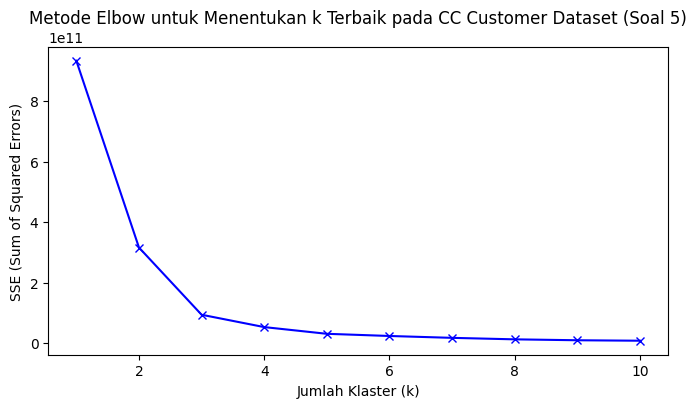

In [34]:
# Menentukan jumlah k terbaik untuk K-Means pada CC Customer Dataset
# Menggunakan Metode Elbow (mirip Soal Nomor 2)

from sklearn.cluster import KMeans

# Daftar nilai SSE
sse_cc_k = []

# Buat rentang k dari 1 hingga 10 (atau lebih, bisa disesuaikan)
K_cc_k = range(1, 11)

# Cari nilai SSE untuk setiap k
for k in K_cc_k:
    kmeans_model_cc_k = KMeans(n_clusters=k, random_state=0, n_init=10)
    # Gunakan data fitur yang sama seperti di Soal Nomor 1 dan 3 (Avg_Credit_Limit dan Total_Credit_Cards)
    kmeans_model_cc_k.fit(X_cc)
    sse_cc_k.append(kmeans_model_cc_k.inertia_)

# Plotting distorsi (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K_cc_k, sse_cc_k, "bx-")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Metode Elbow untuk Menentukan k Terbaik pada CC Customer Dataset (Soal 5)")
plt.show()

**Kegunaan Kode:**

Kode ini mengimplementasikan metode Elbow untuk menentukan jumlah klaster (k) terbaik untuk K-Means pada dataset pelanggan. Kode menghitung nilai Sum of Square Error (SSE) untuk rentang nilai k dari 1 hingga 10.

**Analisis Hasil Output:**

Output dari kode ini adalah plot "Metode Elbow untuk Menentukan k Terbaik pada CC Customer Dataset (Soal 5)". Sumbu horizontal menunjukkan jumlah klaster (k), dan sumbu vertikal menunjukkan nilai SSE. Metode Elbow mencari "siku" pada plot, yaitu titik di mana penurunan SSE mulai melambat secara signifikan.

**Mengapa memilih k tersebut?**

Untuk menentukan nilai k terbaik, kita mencari titik "siku" pada plot. Pada plot ini, terlihat penurunan SSE paling tajam dari k=1 ke k=2, dan kemudian dari k=2 ke k=3. Setelah k=3, penurunan SSE mulai melambat secara signifikan. Ini menunjukkan bahwa menambahkan klaster lebih dari 3 tidak memberikan pengurangan SSE yang substansial. Oleh karena itu, berdasarkan metode Elbow, **nilai k terbaik untuk dataset ini adalah 3**, karena pada titik ini "siku" terbentuk, menandakan bahwa 3 klaster adalah jumlah yang optimal untuk merepresentasikan struktur data.

## Soal Nomor 6

**Tentukan nilai silhouette score dan DBI dari model DBSCAN.**

In [74]:
# Menghitung Silhouette Score dan Davies-Bouldin Index untuk model DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np # Import numpy if not already imported in this cell

# Hitung Silhouette Score
# Pastikan tidak ada klaster yang hanya berisi satu titik atau semua titik dianggap noise (-1)
# Silhouette Score tidak terdefinisi jika hanya ada 1 klaster atau semua titik noise
if len(np.unique(cluster_dbscan[cluster_dbscan != -1])) > 1:
    silhouette_avg = silhouette_score(X_scaled[cluster_dbscan != -1], cluster_dbscan[cluster_dbscan != -1])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score tidak dapat dihitung karena kurang dari 2 klaster non-noise atau semua titik adalah noise.")


# Hitung Davies-Bouldin Index
# DBI tidak terdefinisi jika hanya ada 1 klaster atau semua titik dianggap noise (-1)
if len(np.unique(cluster_dbscan[cluster_dbscan != -1])) > 1:
    db_index = davies_bouldin_score(X_scaled[cluster_dbscan != -1], cluster_dbscan[cluster_dbscan != -1])
    print(f"Davies-Bouldin Index: {db_index}")
else:
     print("Davies-Bouldin Index tidak dapat dihitung karena kurang dari 2 klaster non-noise atau semua titik adalah noise.")

Silhouette Score: 0.5714507283925516
Davies-Bouldin Index: 0.6354238570932433


**Kegunaan Kode:**

Kode ini menghitung dan mencetak nilai *Silhouette Score* dan *Davies-Bouldin Index* (DBI) untuk mengevaluasi kualitas klasterisasi DBSCAN yang telah dilakukan. Metrik ini dihitung hanya pada titik-titik yang tidak dianggap sebagai noise oleh DBSCAN.

**Analisis Output:**

Output menunjukkan nilai *Silhouette Score* sebesar `0.5714507283925516` dan *Davies-Bouldin Index* sebesar `0.6354238570932433`.

*   **Silhouette Score (0.57)**: Nilai ini berada dalam rentang -1 hingga 1. Skor 0.57 menunjukkan bahwa klasterisasi yang dihasilkan oleh DBSCAN dengan parameter yang disesuaikan memiliki kualitas yang cukup baik. Titik-titik data cukup mirip dengan klaster mereka sendiri dibandingkan dengan klaster lain.
*   **Davies-Bouldin Index (0.64)**: Nilai DBI yang lebih rendah menunjukkan klasterisasi yang lebih baik. Nilai 0.64 ini relatif rendah, yang mengindikasikan bahwa klaster yang ditemukan oleh DBSCAN memiliki pemisahan yang cukup baik antar klaster dan cukup kompak secara internal.

Dibandingkan dengan K-Means (dengan 2 fitur, skor 0.49) dan visualisasi DBSCAN sebelumnya pada dataset "moons" (skor 0.32), skor *Silhouette* 0.57 ini menunjukkan hasil klasterisasi yang lebih baik pada dataset pelanggan menggunakan DBSCAN dengan seluruh fitur (setelah disesuaikan parameter) dan mengecualikan noise. Nilai DBI yang rendah juga mendukung temuan ini.